In [2]:
#general libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#scikit learn imports
from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [3]:
#general libraries always needed
import pandas as pd
import numpy as np
import math

#plotting required modules
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FixedLocator, FixedFormatter

#sklearn clustering / unsupervised learning modules
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors

#sklearn modules for preprocessing and transformation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
#function that shows a learning curve for any model that has predict or fit methods
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator,X,y,ylim=None,cv=None,n_jobs=None,train_sizes=np.linspace(0.1, 1.0, 20),scoring = 'neg_root_mean_squared_error'):
    
    _, axes = plt.subplots(1, 1, figsize=(10, 5))    
    axes.set_title('Learning Curve')
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel(scoring)

    train_sizes, train_scores, test_scores= learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes,scoring = scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1,color="r")
    axes.fill_between(train_sizes,test_scores_mean - test_scores_std,test_scores_mean + test_scores_std,alpha=0.1,color="g")
    axes.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
    axes.legend(loc="best")
    plt.show()
    
    return

#code to prevent warnings that can occur as a result of this function
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [5]:
#function to verify the existence of a file in the current working directory and download it if not
import os,urllib, urllib.request, sys, tarfile
def downloadDataResource(file,sourcePath,compressed=None):
    if not os.path.isfile(file):
        try:
            urllib.request.urlretrieve(sourcePath+(compressed if compressed else file),(compressed if compressed else file))
            print("Downloaded", (compressed if compressed else file) )
            if compressed:
                ucomp = tarfile.open(compressed)
                ucomp.extractall()
                ucomp.close()
                print("File uncompressed.")
        except:
            print("ERROR: File", (compressed if compressed else file), "not found. Data source missing.")
    else:
        print("Data resource", file, "already downloaded.")

In [6]:
path = "https://raw.githubusercontent.com/SueMcMetzger/MachineLearning/main/chpt8/"
filename = "In-VehicleCoupon.csv"
downloadDataResource(filename, path)


Data resource In-VehicleCoupon.csv already downloaded.


In [7]:
vehiclecupon = pd.read_csv(filename)

In [8]:
vehiclecupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [9]:
vehiclecupon['education'].value_counts()

Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: education, dtype: int64

In [10]:
vehiclecupon.isna().sum()

destination               0
passenger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_5min             0
toCoupon_15min            0
toCoupon_25min            0
direction_same            0
direction_opp             0
AcceptCoupon              0
dtype: int64

In [11]:
vehicleupdate = vehiclecupon.dropna()


In [12]:
X_train_pre, X_test_pre, y_train, y_test = train_test_split(
    vehicleupdate.drop(columns=['AcceptCoupon']),
    vehicleupdate.AcceptCoupon, 
    test_size=0.2,
    random_state=42
)

In [13]:
#define variables needed to seperate numeric attributes from categorical attributes
cat_income = ['income']
income_ord = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499','$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More']#defining ordnial encoding for Ocean Proximity
cat_time = ['time']
time_ord = ['7AM', '10AM', '2PM', '6PM', '10PM']
cat_expiration =['expiration']
expiration_ord = ['2h', '1d']
cat_age = ['age']
age_ord = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
cat_education = ['education']
education_ord = ['Some High School','High School Graduate','Some college - no degree','Associates degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)']
cat_attribs = ["destination", "expiration", "passenger", "weather", "toCoupon_5min", "toCoupon_25min", "toCoupon_15min", "direction_same", "direction_opp", "gender", "maritalStatus", "has_children", "Bar", "CoffeeHouse", "CarryAway", "occupation", "RestaurantLessThan20", "Restaurant20To50" ]
num_attribs = ['temperature']


In [14]:
num_pipeline = Pipeline( [
    ('imputer', SimpleImputer(strategy="median")),
    #('log', PowerTransformer()),     
    ('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(sparse = False), cat_attribs),
    ('income_ord', OrdinalEncoder(categories = [income_ord]), cat_income),
    ('time_ord', OrdinalEncoder(categories = [time_ord]), cat_time),
    ('expiration_ord', OrdinalEncoder(categories = [expiration_ord]), cat_expiration),
    ('age_ord', OrdinalEncoder(categories = [age_ord]), cat_age),
    ('education_ord', OrdinalEncoder(categories = [education_ord]), cat_education)
    #('cat', OrdinalEncoder(categories = [proximity_ord]), cat_attribs)  
])

In [15]:
#take the training data set and create an array of prepared data
X_train = full_pipeline.fit_transform(X_train_pre)
X_test = full_pipeline.transform(X_test_pre)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9663, 86), (2416, 86), (9663,), (2416,))

In [16]:
#create a linear regression model
log_reg=LogisticRegression(C=2)      #regularization is defined by 1/C so a lower C value, a higher level of regularization

#fit the model to the training data set
log_reg.fit( X_train, y_train)

#calculated the accuracy (i.e. predicted vs. actual for the training data set)
acc = log_reg.score(X_train, y_train)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 64.95%


In [17]:
#use cross valudation to process the data 10 different ways using the logsitic regression model generated above
scores = cross_val_score(log_reg, X_train, y_train, cv=10)

# look at average across all folds
print('Accuracy: {:.2f}%'.format( scores.mean()*100 ) )

Accuracy: 63.92%


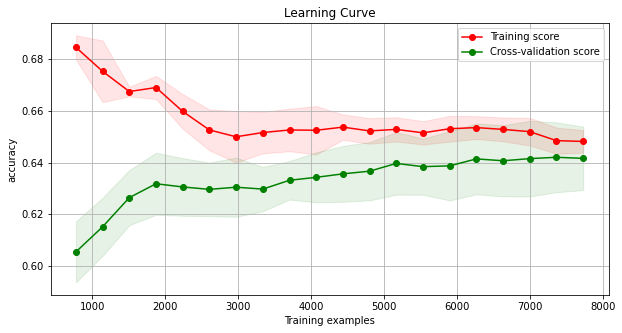

In [18]:
#review the learning curve
plot_learning_curve(log_reg, X_train, y_train, scoring="accuracy")

In [19]:
#create a parameter grid that determines the variable hyperparameters
param_grid = [
    {'solver': ['saga', 'newton-cg', 'lbfgs', 'sag'],
     'multi_class': ['ovr', 'multinomial'],
     'C': [.5, 1, 2]
    }
]

# train across 10 folds, that's a total of (4*6)*10=240 rounds of training 
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=10,
                           scoring='accuracy',
                           return_train_score=True)

#fit the data to the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [0.5, 1, 2],
                          'multi_class': ['ovr', 'multinomial'],
                          'solver': ['saga', 'newton-cg', 'lbfgs', 'sag']}],
             return_train_score=True, scoring='accuracy')

In [20]:
#display the results of the GridSearchCV
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Accuracy: {:,.2f}% - {}".format( mean_score*100, params) )

Accuracy: 64.01% - {'C': 0.5, 'multi_class': 'ovr', 'solver': 'saga'}
Accuracy: 64.00% - {'C': 0.5, 'multi_class': 'ovr', 'solver': 'newton-cg'}
Accuracy: 64.02% - {'C': 0.5, 'multi_class': 'ovr', 'solver': 'lbfgs'}
Accuracy: 64.00% - {'C': 0.5, 'multi_class': 'ovr', 'solver': 'sag'}
Accuracy: 63.96% - {'C': 0.5, 'multi_class': 'multinomial', 'solver': 'saga'}
Accuracy: 63.96% - {'C': 0.5, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
Accuracy: 63.95% - {'C': 0.5, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Accuracy: 63.95% - {'C': 0.5, 'multi_class': 'multinomial', 'solver': 'sag'}
Accuracy: 63.96% - {'C': 1, 'multi_class': 'ovr', 'solver': 'saga'}
Accuracy: 63.96% - {'C': 1, 'multi_class': 'ovr', 'solver': 'newton-cg'}
Accuracy: 63.96% - {'C': 1, 'multi_class': 'ovr', 'solver': 'lbfgs'}
Accuracy: 63.96% - {'C': 1, 'multi_class': 'ovr', 'solver': 'sag'}
Accuracy: 63.96% - {'C': 1, 'multi_class': 'multinomial', 'solver': 'saga'}
Accuracy: 63.96% - {'C': 1, 'multi_class': 'm

In [21]:
#display the best solution
grid_search.best_params_

{'C': 0.5, 'multi_class': 'ovr', 'solver': 'lbfgs'}

In [22]:
#use the parameters found above to create the model
model = LogisticRegression(**grid_search.best_params_)

#fit the model to the training data set
model.fit(X_train, y_train)

#calculated the accuracy (i.e. predicted vs. actual for the training data set)
acc = model.score(X_train, y_train)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 64.97%


In [25]:
#use the parameters found above to create the model
model = LogisticRegression(**grid_search.best_params_)

model.fit(X_test, y_test)
#calculated the accuracy (i.e. predicted vs. actual for the test data set)
acc = model.score(X_test, y_test)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 65.56%


In [80]:
 #use cross valudation to process the data 10 different ways using the logsitic regression model generated above
scores = cross_val_score(model, X_train, y_train, cv=10)

# look at average across all folds
print('Accuracy: {:.2f}%'.format( scores.mean()*100 ) )

Accuracy: 64.02%


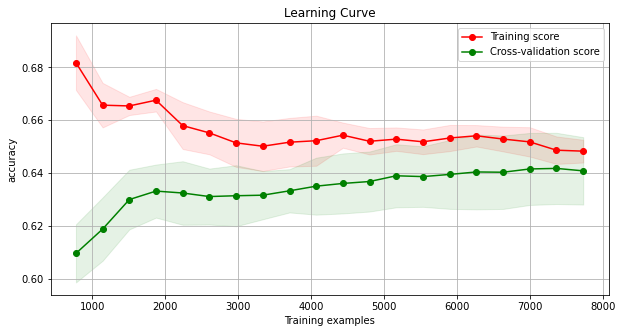

In [96]:
plot_learning_curve(model, X_train, y_train, scoring='accuracy')

In [33]:
pca = PCA(n_components=.95)
X_train_reduced = pca.fit_transform(X_train)
X_train_reduced.shape

(9663, 31)

In [34]:
X_test_reduced = pca.transform(X_test)

In [35]:
X_test_reduced.shape

(2416, 31)

In [37]:
#create a linear regression model
log_reg1=LogisticRegression(C=2)      #regularization is defined by 1/C so a lower C value, a higher level of regularization

#fit the model to the training data set
log_reg1.fit( X_train_reduced, y_train)

#calculated the accuracy (i.e. predicted vs. actual for the training data set)
acc = log_reg1.score(X_train_reduced, y_train)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 64.11%


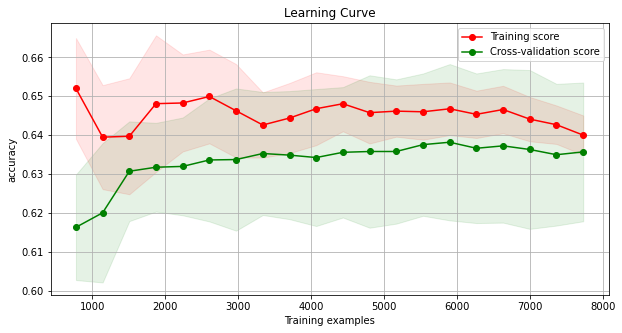

In [38]:
plot_learning_curve(log_reg1, X_train_reduced, y_train, scoring="accuracy")

In [39]:
#create a parameter grid that determines the variable hyperparameters
param_grid = [
    {'solver': ['saga', 'newton-cg', 'lbfgs', 'sag'],
     'multi_class': ['ovr', 'multinomial'],
     'C': [.5, 1, 2]
    }
]

# train across 10 folds, that's a total of (4*6)*10=240 rounds of training 
grid_search1 = GridSearchCV(LogisticRegression(), param_grid, cv=10,
                           scoring='accuracy',
                           return_train_score=True)

#fit the data to the model
grid_search1.fit(X_train_reduced, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [0.5, 1, 2],
                          'multi_class': ['ovr', 'multinomial'],
                          'solver': ['saga', 'newton-cg', 'lbfgs', 'sag']}],
             return_train_score=True, scoring='accuracy')

In [41]:
#use the parameters found above to create the model
model1 = LogisticRegression(**grid_search1.best_params_)

#fit the model to the training data set
model1.fit(X_train_reduced, y_train)

#calculated the accuracy (i.e. predicted vs. actual for the training data set)
acc = model1.score(X_train_reduced, y_train)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 64.11%


In [43]:
#use the parameters found above to create the model
model1 = LogisticRegression(**grid_search.best_params_)

model1.fit(X_test_reduced, y_test)
#calculated the accuracy (i.e. predicted vs. actual for the test data set)
acc = model1.score(X_test_reduced, y_test)
print('Accuracy: {:.2f}%'.format(acc*100))

Accuracy: 64.16%


In [44]:
 #use cross valudation to process the data 10 different ways using the logsitic regression model generated above
scores = cross_val_score(model1, X_train_reduced, y_train, cv=10)

# look at average across all folds
print('Accuracy: {:.2f}%'.format( scores.mean()*100 ) )

Accuracy: 63.71%


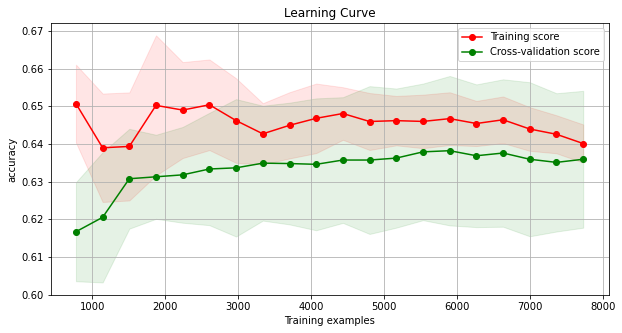

In [45]:
plot_learning_curve(model1, X_train_reduced, y_train, scoring="accuracy")